In [2]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('log2.csv')

print(df.isnull().sum())
df.sample(10)

Saving log2.csv to log2.csv
Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
Action                  0
dtype: int64


,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
54578,40180,443,53378,443,1310,649,661,13,184,7,6,allow
34860,53707,44209,9971,44209,1513,989,524,17,16,10,7,allow
49902,60715,443,1663,443,1716,1136,580,15,30,9,6,allow
25925,63331,51221,0,0,62,62,0,1,0,1,0,deny
5375,32843,443,63526,443,6444,2640,3804,18,122,9,9,allow
40056,16001,48817,0,0,143,143,0,1,0,1,0,deny
62692,49840,443,9507,443,58656,12994,45662,148,71,64,84,allow
26849,35232,36602,0,0,74,74,0,1,0,1,0,deny
3819,58638,5900,58638,5900,62,62,0,1,5,1,0,allow
58837,52212,445,0,0,66,66,0,1,0,1,0,drop


As we can see we have no missing values in our data set. so thats a great news for us as we dont need to perform any imputation or removal of rows/columns to handle missing data. Now we'll proceed to next steps.

In [3]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


Mean Comparison:
Bytes Received: Higher mean (74,738) compared to Bytes Sent (22,386).
Standard Deviation Comparison:
Bytes Received: Higher standard deviation compared to Bytes Sent.
Therefore, the Bytes Received column has both a higher mean and standard deviation, indicating greater variability in the amount of data received compared to the data sent.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

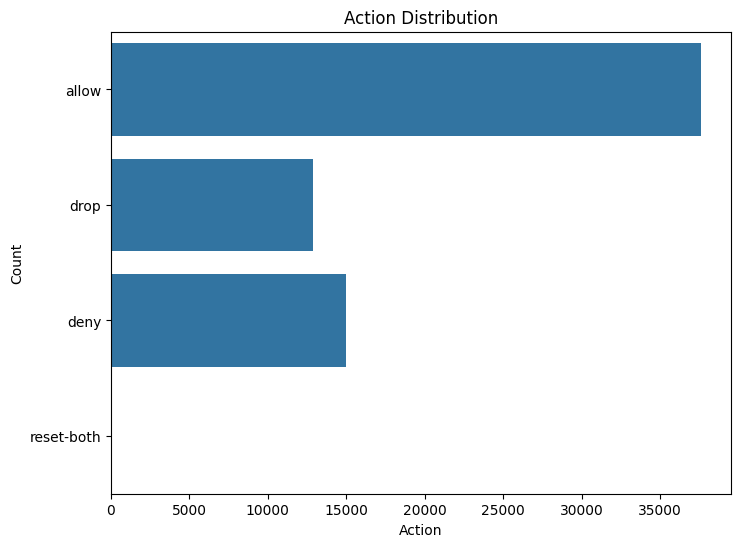

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(df['Action'])
plt.title('Action Distribution')
plt.xlabel('Action')
plt.ylabel('Count')
plt.show()


The countmap displays the distribution of numerical features across different actions. It helps to visualize how numerical attributes vary based on different actions.

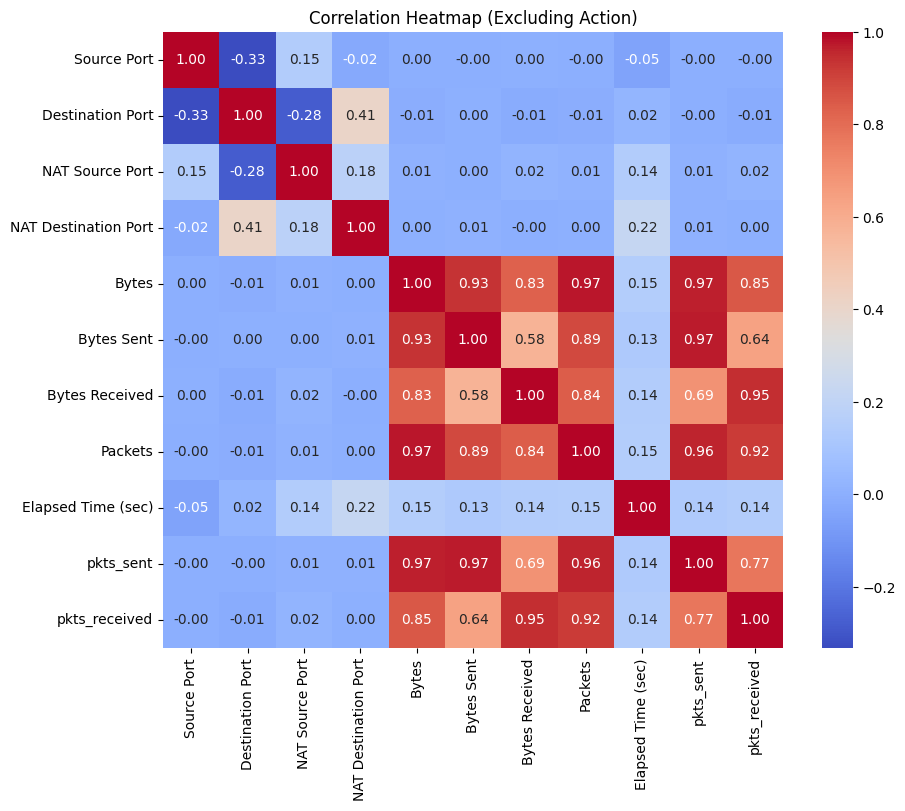

In [6]:
numeric_data = df.drop(columns=['Action'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Excluding Action)')
plt.show()

The heatmap shows that when one byte-related feature changes, others related to bytes and packets change in a similar manner. This suggests they're closely connected, revealing insights into how data moves across the network.

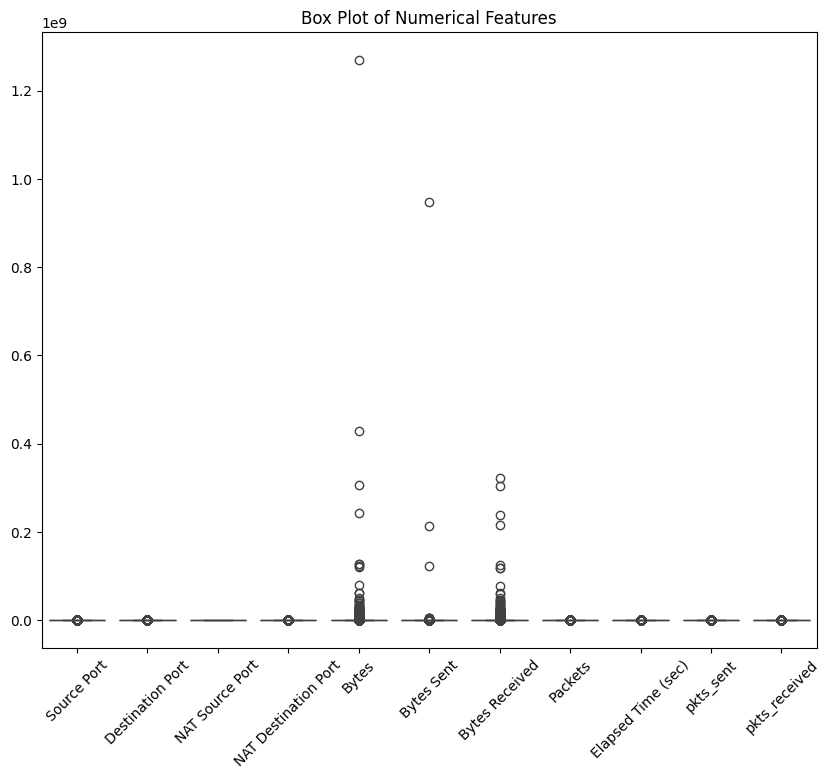

In [7]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=numeric_data)
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

The presence of two outliers, connected to each other but distinct from the bulk of the data, suggests a unique pattern or anomaly requiring further investigation. Addressing these outliers is crucial for ensuring the accuracy and robustness of classification algorithms.

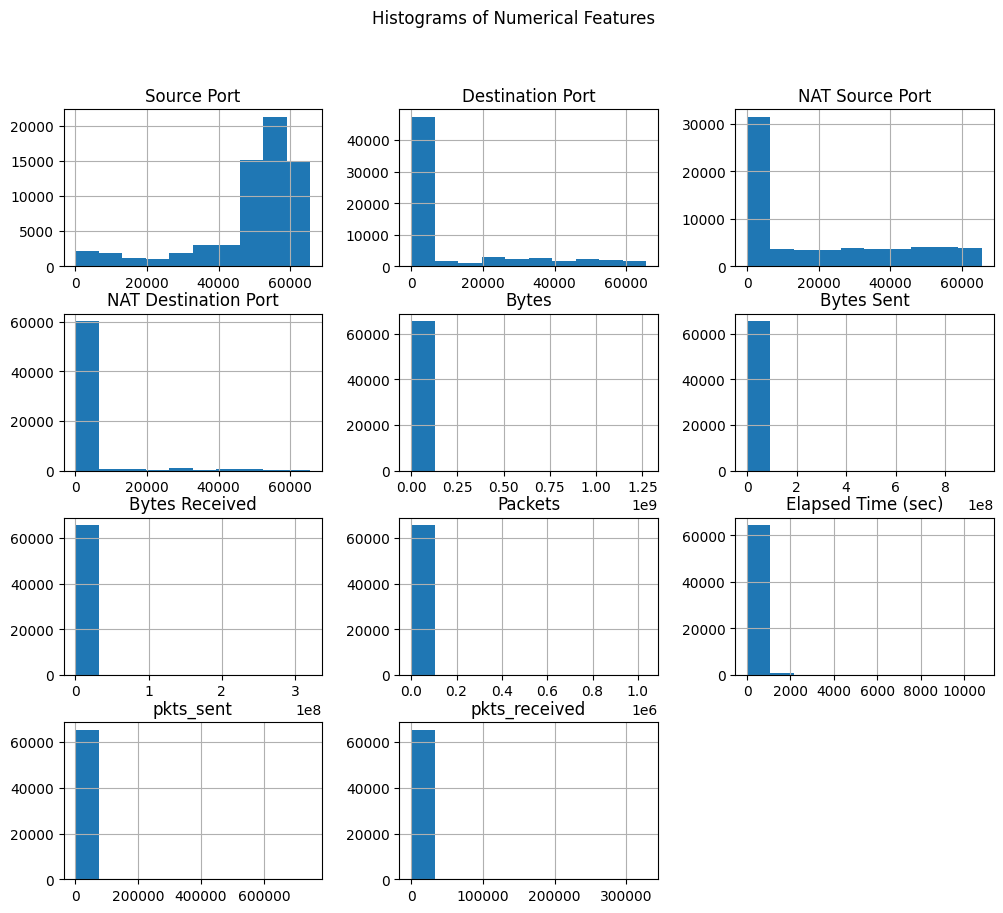

In [8]:
numeric_data.hist(figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [10]:
df_copy = df.copy()

# Encode the 'Action' column with numeric values and create a new column 'Action_Encoded'
label_encoder = LabelEncoder()
df_copy['Action_Encoded'] = label_encoder.fit_transform(df_copy['Action'])


# Step 2: Scaling numerical features
scaler = StandardScaler()
df_copy[numeric_data.columns] = scaler.fit_transform(df_copy[numeric_data.columns])
# Display the updated DataFrame
print("Updated Data:")
df_copy.head()


Updated Data:


,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action,Action_Encoded
0,0.513256,-0.569937,1.606882,-0.268819,-0.017255,-0.005823,-0.030308,-0.019651,-0.118474,-0.012551,-0.027197,allow,0
1,0.450066,-0.389279,1.682938,0.073718,-0.016438,-0.005430,-0.029056,-0.016339,-0.161455,-0.009755,-0.023598,allow,0
2,-2.786582,2.152272,1.091555,4.892650,-0.017244,-0.005817,-0.030293,-0.019651,3.746507,-0.012551,-0.027197,allow,0
3,0.076105,-0.389279,1.423272,0.073718,-0.016695,-0.005472,-0.029575,-0.017118,-0.161455,-0.010376,-0.024498,allow,0
4,0.039987,-0.548817,1.209121,-0.228774,-0.012773,-0.004077,-0.022799,-0.014001,-0.164761,-0.008823,-0.019550,allow,0


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
X = df_copy.drop(['Action', 'Action_Encoded'], axis=1)
y = df_copy['Action_Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:


# Implementing Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
rf_accuracy=accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7545
           1       1.00      1.00      1.00      2994
           2       1.00      1.00      1.00      2562
           3       1.00      0.67      0.80         6

    accuracy                           1.00     13107
   macro avg       1.00      0.92      0.95     13107
weighted avg       1.00      1.00      1.00     13107

Random Forest Accuracy: 0.9984740978103304


In [13]:
# Implementing Support Vector Machine
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

print("\nSupport Vector Machine Classification Report:")
print(classification_report(y_test, y_pred_svm, zero_division=1))
svm_accuracy=accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)


Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7545
           1       0.99      0.96      0.97      2994
           2       0.95      1.00      0.97      2562
           3       1.00      0.00      0.00         6

    accuracy                           0.99     13107
   macro avg       0.98      0.74      0.74     13107
weighted avg       0.99      0.99      0.99     13107

SVM Accuracy: 0.9864194705119402


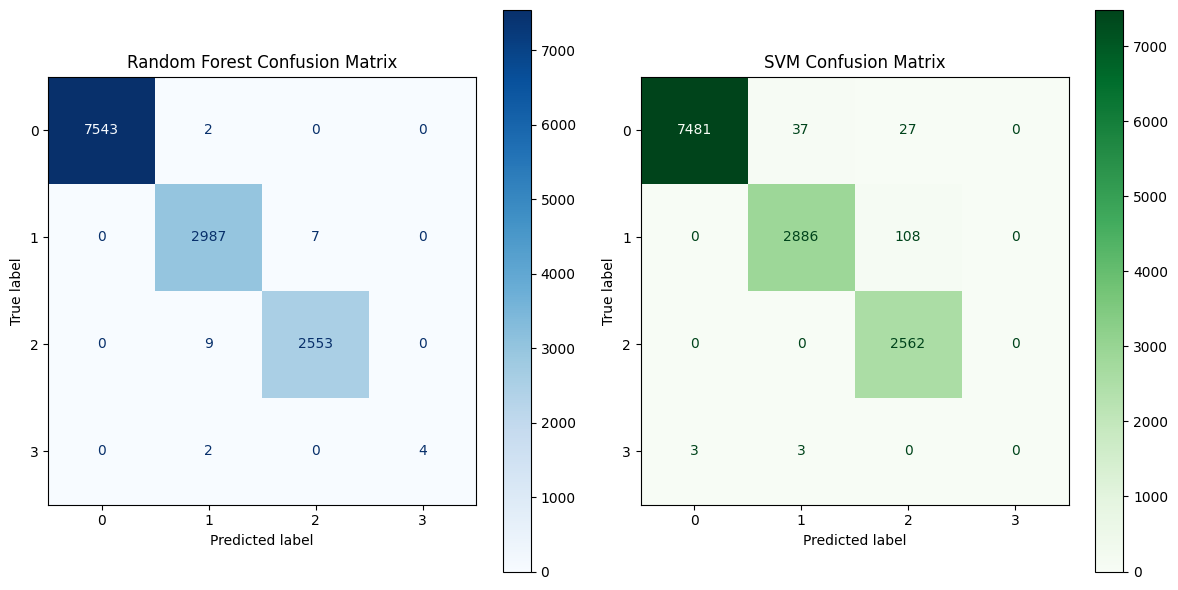

Random Forest Accuracy: 0.9984740978103304
SVM Accuracy: 0.9864194705119402
Random Forest algorithm performs better.


In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix for Random Forest model
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Compute confusion matrix for SVM model
svm_conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot Random Forest Confusion Matrix
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_conf_matrix, display_labels=rf_clf.classes_)
rf_disp.plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Random Forest Confusion Matrix')

# Plot SVM Confusion Matrix
svm_disp = ConfusionMatrixDisplay(confusion_matrix=svm_conf_matrix, display_labels=svm_clf.classes_)
svm_disp.plot(ax=axes[1], cmap='Greens')
axes[1].set_title('SVM Confusion Matrix')

plt.tight_layout()
plt.show()

print("Random Forest Accuracy:", rf_accuracy)
print("SVM Accuracy:", svm_accuracy)

if rf_accuracy > svm_accuracy:
    print("Random Forest algorithm performs better.")
elif rf_accuracy < svm_accuracy:
    print("SVM algorithm performs better.")
else:
    print("Both algorithms perform equally well.")